
# Analysis on COVID 19 data

## - Extraction of data ( Beautiful soup)
## - Cleaning of data (Pandas, numpy)
## - Visualization in Jupyter and Tableau ( seaborn, matplotlib)
## - Mining interesting insight    

__Soure__: https://www.worldometers.info/coronavirus/ and 

__susequent sources__ : https://www.worldometers.info/coronavirus/about/#sources

In [1]:
import requests
from bs4 import BeautifulSoup 

In [3]:
response = requests.get('https://www.worldometers.info/coronavirus/')

In [5]:
covid_data = response.content

In [6]:
soup = BeautifulSoup(covid_data)

In [ ]:
soup.prettify

In [26]:
for table in soup.find_all('table'):
    print(table.attrs['id'])

main_table_countries_today
main_table_countries_yesterday


In [95]:
# will pick data from main_table_countries_today
data = soup.find_all('table')[0]
column_name = []
# look for header first
for th in data.find_all('th'):
    column_name.append(th.text)
    print(th.text)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent


In [ ]:
# look for all rows 
for tr in data.find_all('tr'):
    print(tr.text)

In [52]:
# look for data from one row

tr = data.find_all('tr')

for td in tr[1].find_all('td'):
    print(td.text)



North America

1,765,720
+2,919
108,253
+436
468,319
1,189,148
18,977





North America


In [87]:
# now extracting data from all rows
table_data = []
for tr in data.find_all('tr'):
    row_data=[]
    for td in tr.find_all('td'):
        row_data.append(td.text)
    table_data.append(row_data)

In [88]:
# list inside which are empty
for i,lst in enumerate(table_data):
    if len(lst)==0:
        print(i, lst)

0 []


In [89]:
# removing the list at index 0
table_data.remove([])
# table_data.pop(index=0)

In [91]:
len(table_data)

231

In [221]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [316]:
df_covid = pd.DataFrame(data=table_data,columns=column_name)

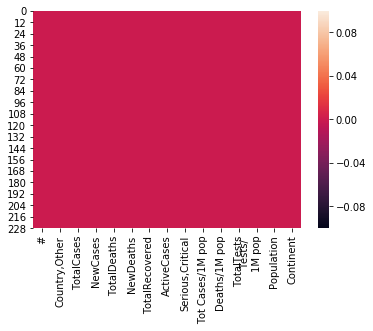

In [204]:
sns.heatmap(df_covid.isna()) # isna function shows that it does not have any null values. however it requires more checking.

In [205]:
df_covid.shape

(231, 15)

In [206]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
#                   231 non-null object
Country,Other       231 non-null object
TotalCases          231 non-null object
NewCases            231 non-null object
TotalDeaths         231 non-null object
NewDeaths           231 non-null object
TotalRecovered      231 non-null object
ActiveCases         231 non-null object
Serious,Critical    231 non-null object
Tot Cases/1M pop    231 non-null object
Deaths/1M pop       231 non-null object
TotalTests          231 non-null object
Tests/
1M pop
      231 non-null object
Population          231 non-null object
Continent           231 non-null object
dtypes: object(15)
memory usage: 27.2+ KB


In [207]:
df_covid.describe(include = 'all')

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
count,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
unique,216,224,203,30,125,15,195,177,75,189,87,185,186,215,8
top,,Total:,18,,,,6,0,,,,,,,Africa
freq,16,8,5,189,34,202,5,22,88,16,50,46,46,16,59


In [208]:
# lets pick one column and sort it in ascending order. and check for any null value.
df_covid['NewCases'].sort_values()

115          
127          
128          
129          
130          
        ...  
124        +8
230    +8,623
7      +8,623
110        +9
133        +9
Name: NewCases, Length: 231, dtype: object

In [209]:
df_covid['NewCases'][115] 
# there are lot of cell with '' value. but it is considered as str. So now need to change them into nan.

''

In [210]:
df_covid['NewCases'][115] = np.nan

In [211]:
df_covid['NewCases'][115] 

nan

In [212]:
df_covid.isna().sum()

#                   0
Country,Other       0
TotalCases          0
NewCases            1
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/\n1M pop\n    0
Population          0
Continent           0
dtype: int64

In [317]:
# removing all '' cells with np.nan
counter=0
for i in df_covid:
    for index,j in enumerate(df_covid[i]):
        if isinstance(j,str) and len(j)==0:
            df_covid[i][index]=np.nan
            counter+=1
print( 'Tolal null value updated :', counter)            

Tolal null value updated : 675


In [318]:
df_covid.isna().sum()

#                    16
Country,Other         0
TotalCases            0
NewCases            189
TotalDeaths           0
NewDeaths           202
TotalRecovered        2
ActiveCases           0
Serious,Critical     88
Tot Cases/1M pop     16
Deaths/1M pop        50
TotalTests           46
Tests/\n1M pop\n     46
Population           16
Continent             4
dtype: int64

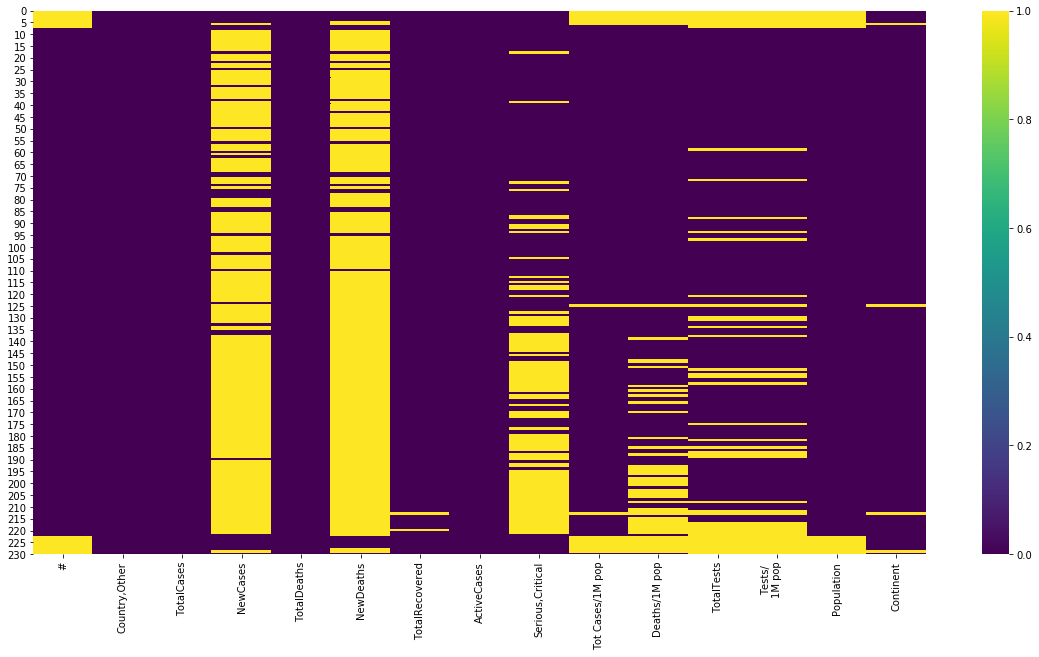

In [241]:

plt.figure(figsize=(20,10))
sns.heatmap(df_covid.isna(),cmap='viridis') 

## There are several cells with null values. Yellow shows null.

## List of Highly impacted country - Total cases till now



In [319]:
## change the data type to int, and remove ',' from each number first.
df_covid['TotalCases'] = df_covid['TotalCases'].map(lambda x:int(x.replace(',','')))

In [307]:
## remove unwanted data & check only top 20 countries
df_covid=df_covid[ df_covid['#'].isna() == False]


In [371]:
df_covid_a = df_covid.sort_values(by='TotalCases',ascending = False).head(20)

Text(0.5, 0, 'Impacted Countries')

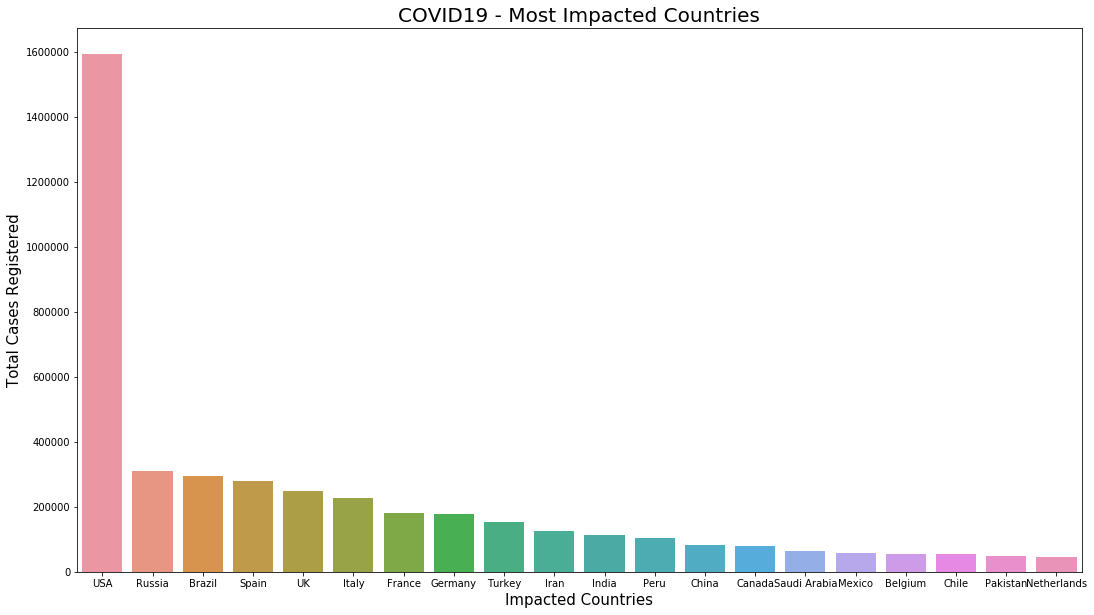

In [454]:
plt.figure(figsize=(18,10))
sns.barplot(df_covid_a['Country,Other'],df_covid_a['TotalCases'], data=df_covid_a)
plt.title('COVID19 - Most Impacted Countries',{'fontsize':20})
plt.ylabel('Total Cases Registered',{'fontsize':15})
plt.xlabel('Impacted Countries',{'fontsize':15})


## Most active cases 

In [373]:
## change the data type to int, and remove ',' from each number first.


df_covid['ActiveCases'] = df_covid['ActiveCases'].map(lambda x:int(x.replace(',','')) if isinstance(x,str) else x)

In [374]:
df_covid['ActiveCases'].sort_values(ascending = False)

8      1127286.0
9       220341.0
10      157780.0
14       90089.0
18       63582.0
         ...    
203          0.0
197          0.0
221          0.0
12           NaN
26           NaN
Name: ActiveCases, Length: 215, dtype: float64

In [375]:
df_covid=df_covid[ df_covid['#'].isna() == False]
df_covid_b = df_covid.sort_values(by='ActiveCases',ascending = False).head(20)

Text(0.5, 0, 'Impacted Countries')

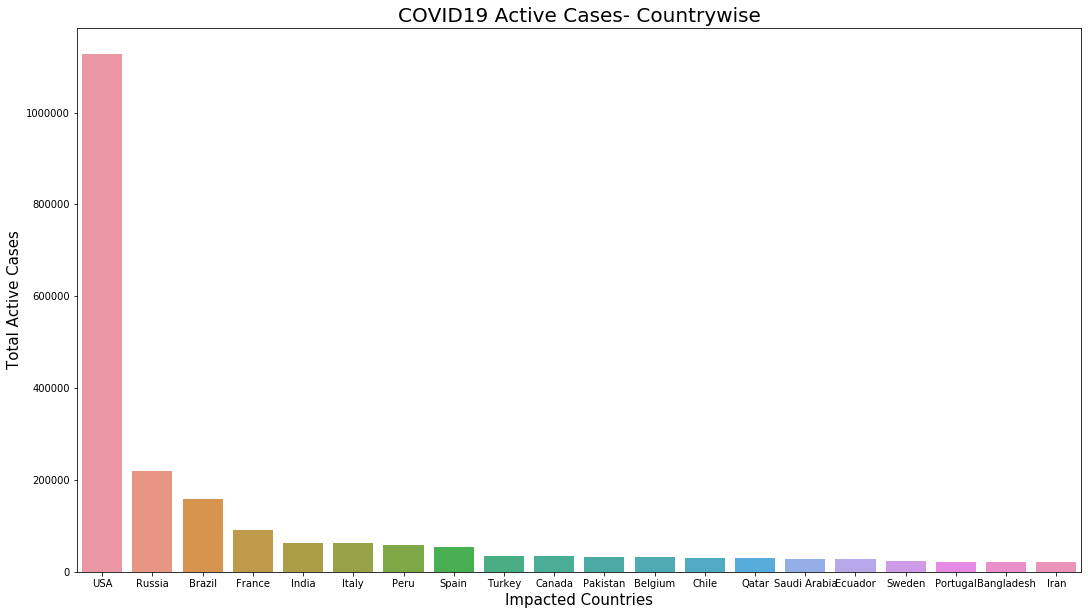

In [376]:
plt.figure(figsize=(18,10))
plt.title('COVID19 Active Cases- Countrywise',{'fontsize':20})

sns.barplot(df_covid_b['Country,Other'],df_covid_b['ActiveCases'], data=df_covid_b)
plt.ylabel('Total Active Cases',{'fontsize':15})
plt.xlabel('Impacted Countries',{'fontsize':15})

## Resilient Quality shown  ( Recovery )

### Recovery rate would be calculated as ( total cases recovered / total cases registered ) * 100

In [445]:
df_covid['TotalRecovered'] = df_covid['TotalRecovered'].map(lambda x:int(x.replace(',','')) \
                                                            if np.logical_and(isinstance(x,str),x!='N/A') else x)

In [446]:
# df_covid['RecoveryRate'] = df_covid['TotalRecovered']/df_covid['TotalCases']*100

# there are some values which are stopping to make plot. need to remove them.

for i in df_covid['TotalRecovered']:
    if isinstance(i,str):
        print(i, 'str')
    elif isinstance(i,float):
        print(i, 'float')
    


N/A str
N/A str
nan float
nan float


In [447]:

# UK and Netherland 'TotalRecovered' count is not available. will remove them from plot.

df_covid_c = df_covid.drop(labels=(df_covid[df_covid['TotalRecovered']=='N/A']).index,axis=0)

In [448]:
print(df_covid_c.shape,'---', df_covid.shape) # two rows deleted from df_covid_c

(213, 15) --- (215, 15)


In [449]:
df_covid_c['RecoveryRate'] = df_covid_c['TotalRecovered']/df_covid_c['TotalCases']*100

In [450]:
df_covid_c['RecoveryRate']

8       23.277
9      27.6614
10     39.7751
11     70.4619
13     58.1807
        ...   
218        100
219        100
220        NaN
221        100
222    94.3134
Name: RecoveryRate, Length: 213, dtype: object

In [452]:
df_covid_c1 = df_covid_c.sort_values(by=['TotalCases'],ascending = False).head(20)

Text(0.5, 0, 'Impacted Countries')

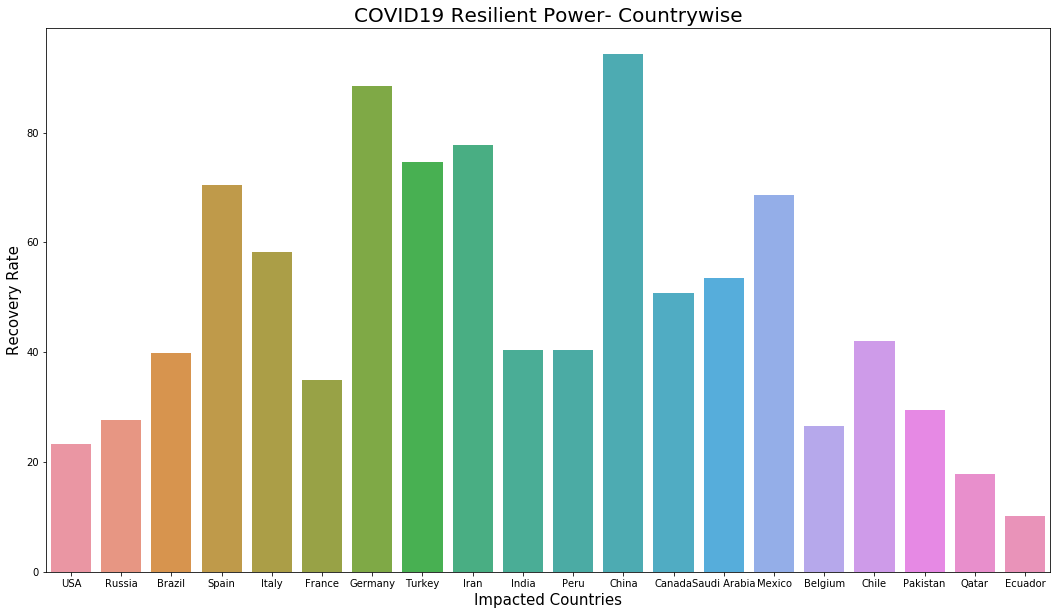

In [453]:
plt.figure(figsize=(18,10))
plt.title('COVID19 Resilient Power- Countrywise',{'fontsize':20})

sns.barplot(df_covid_c1['Country,Other'],df_covid_c1['RecoveryRate'], data=df_covid_c1)
plt.ylabel('Recovery Rate',{'fontsize':15})
plt.xlabel('Impacted Countries',{'fontsize':15})

## Below countries are recovering fast as per the data - 
- China
- Germany
- Iran
- Turkey
- Spain
- Mexico

Above countries have managed to recover more than 60%. 

Next will export the data in Tableau: and further data mining would be carried out. Updated version will be updated here. 